In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
#import pydotplus
import pandas as pd

In [4]:
iris = pd.read_excel("Iris.xls")
iris.info()
X = iris[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = iris['iris']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [9]:
clf = RandomForestClassifier(n_estimators=100) # so cay trong rung
# lam voi: 30, 50, 70, 100, 150, 200 => chon Rung phu hop theo so luong cay (scor
# thuc hien vong lap theo so cay trong rung lst_cay = [30, 50, 70, 100]
# => tao rung theo tung gia tri trong lst_cay
# => do do chinh xac acc, neu do chinh xac = nhau => so sanh train/test r^2
# => chon model random forest co do chinh xac cao nhat, chenh lech giua train/tes
# Train model
model = clf.fit(X_train, y_train)

In [10]:
# How to show information of trees in random forest
model.estimators_[:3] # 0..99

[DecisionTreeClassifier(max_features='auto', random_state=1241301309),
 DecisionTreeClassifier(max_features='auto', random_state=982492074),
 DecisionTreeClassifier(max_features='auto', random_state=1713439346)]

In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [13]:
X_new = np.array([[4.7, 3.2, 1.3, 0.2],
[6.6, 3. , 4.4, 1.4],
[5.9, 3. , 5.1, 1.8]])

In [14]:
yhat_new = model.predict(X_new)
yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
#SELECT IMPORTANT FEATURES
imp_features = pd.Series(model.feature_importances_,
index=X.columns).sort_values(ascending = False)

In [16]:
imp_features

petalwidth     0.490115
petallength    0.407721
sepallength    0.086908
sepalwidth     0.015256
dtype: float64

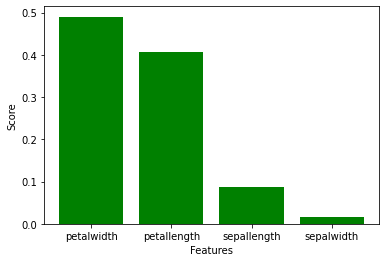

In [17]:
plt.bar(imp_features.index, imp_features, color="g")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

In [18]:
# Build model with 2 important features
X = iris[['petallength', 'petalwidth']]
y = iris['iris']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [20]:
model_new = RandomForestClassifier(n_estimators=100)
# Train model
model_new.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred_new = model_new.predict(X_test)

In [23]:
y_pred_new = model_new.predict(X_test)

In [25]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_new))

Accuracy: 0.9777777777777777


In [26]:
X_new = np.array([[1.3, 0.2],
[4.4, 1.4],
[5.1, 1.8]])

In [27]:
yhat_new = model_new.predict(X_new)
yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
# Avg max depth
max_depth = list()
for tree in model_new.estimators_:
    max_depth.append(tree.tree_.max_depth)
print("avg max depth %0.1f" % (sum(max_depth) / len(max_depth)))

avg max depth 4.5
